In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=2.0,
    center_box=(-10.0, 10.0), # range for each feature
    shuffle=True,
    random_state=10, # For reproducibility
)

In [3]:
n_clusters = [2, 3, 4, 5, 6]

In [4]:
def plot(n):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    # The 1st (ax1) subplot is the silhouette plot, which in general can range from -1 to 1.
    ax1.set_xlim([-0.1, 1])

    space = 10
    blank_space = (n + 1)*space   # for inserting blank space between silhouettes (10 will be such space)
    ax1.set_ylim([0, len(X) + blank_space])

    # clustering
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score gives the average value for all the samples, as well as
    # a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = copy(space)  # blank space in the lowest position (will be change for each cluster iteration)
    for i in range(n):

        # Aggregate the silhouette scores for each sample belonging to cluster i, and sort them.
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/n)
        # Fill the area between two vertical curves.
        ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(x=-0.05,
                 y=y_lower + 0.5*size_cluster_i,
                 s=str(i)
        )

        # Compute the new y_lower for next silhouette
        y_lower = y_upper + 10

        ax1.set_xlabel("silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float)/n)
        ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

        # cluster-center positions
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("feature 1st")
    ax2.set_ylabel("feature 2nd")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n,
                  fontsize=14, fontweight="bold")

    plt.show()
    return f"For n_clusters = {n}, the average silhouette_score is: {silhouette_avg}"

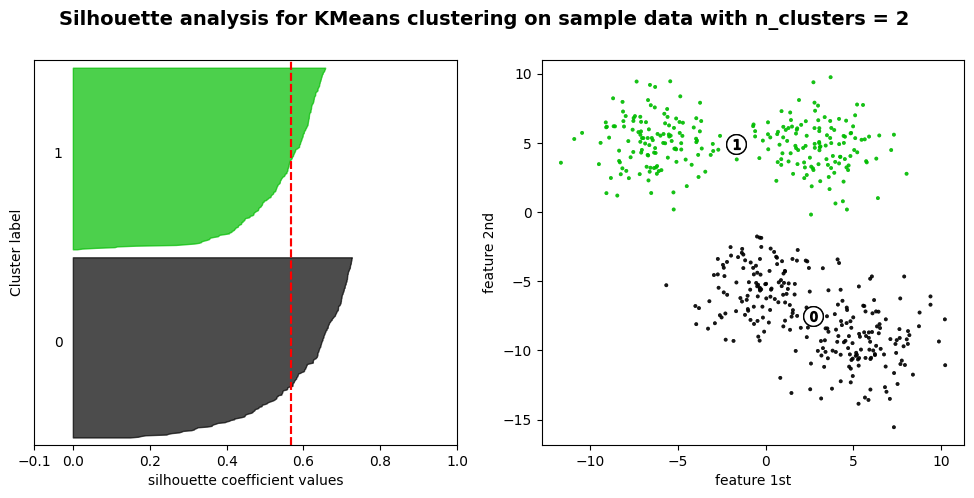

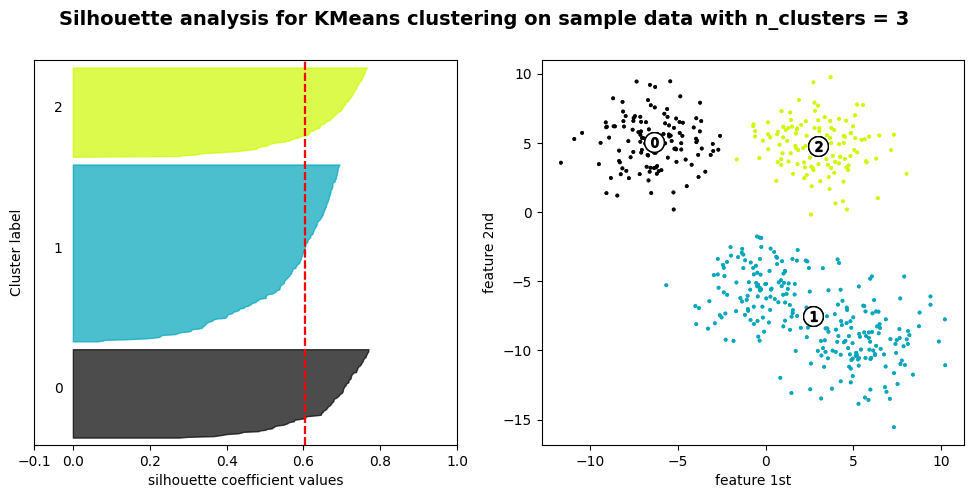

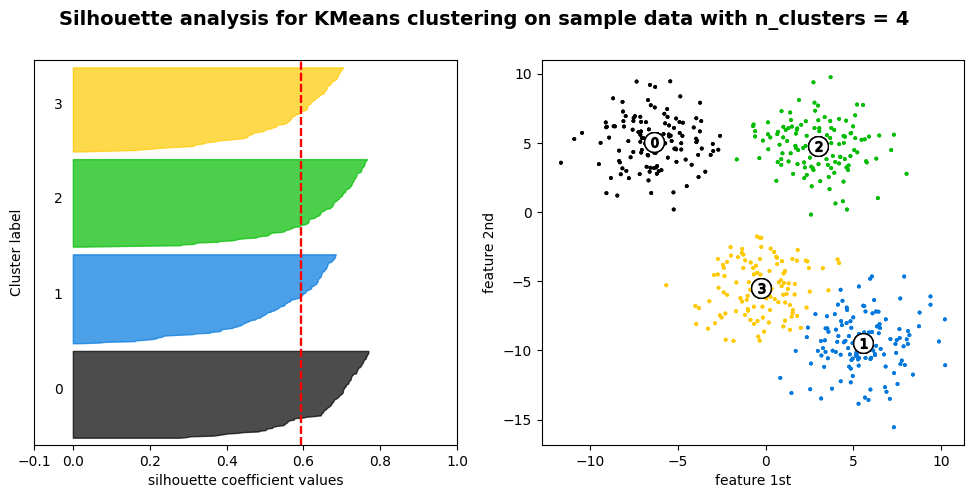

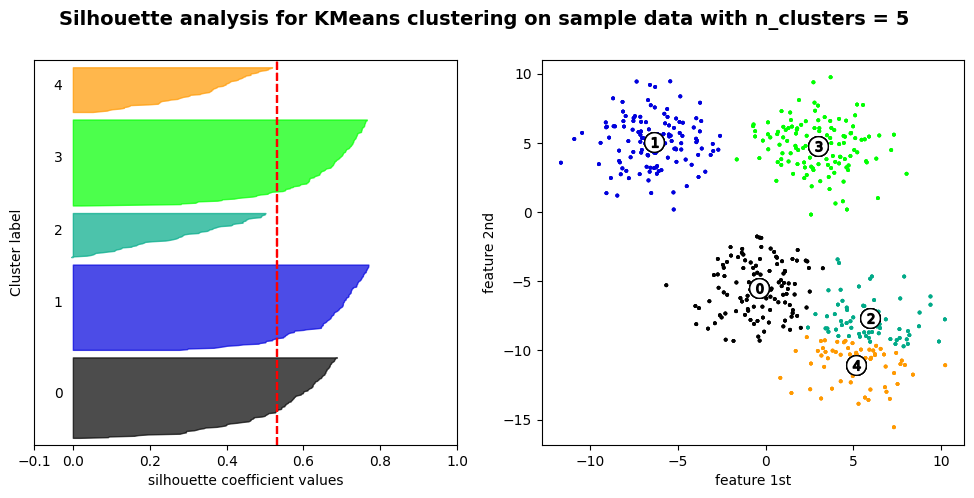

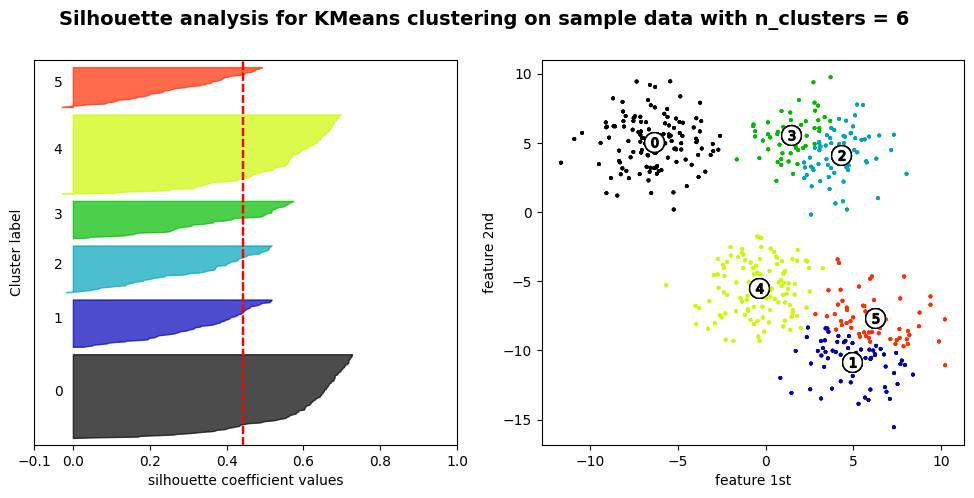

For n_clusters = 2, the average silhouette_score is: 0.5689200982348741
For n_clusters = 3, the average silhouette_score is: 0.6038793966000389
For n_clusters = 4, the average silhouette_score is: 0.5944347491436024
For n_clusters = 5, the average silhouette_score is: 0.5316528681725629
For n_clusters = 6, the average silhouette_score is: 0.44287044437640916


In [5]:
messages=[]
for n in n_clusters:
    messages.append(plot(n))

for message in messages:
    print(message)

We can observe that for n_clusters equal to 3 and 4 are obtaines the highest average silhouette score. Although this value is slightlt higher for n_clusters=3, its silhouette areas (for each cluster) are disproportionate to each other, unlike the case when n_clusters=3, whose areas are more similar to each other. Therefore, the chosen n_clusters is 4, as expected from the data generation.

This panorama can be also visualized from the inertia_score plot, seaching for the elbow in the curve.

In [6]:
def plot_inertia():

    inertia = []
    n_clusters = range(1, 11)
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, random_state=10)  # same estimator and seed
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(5, 4))
    plt.plot(n_clusters, [i/1e3 for i in inertia], marker='o', linestyle='--')
    plt.xlabel('n-clusters')
    plt.ylabel('Inertia (10$^3$)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return inertia

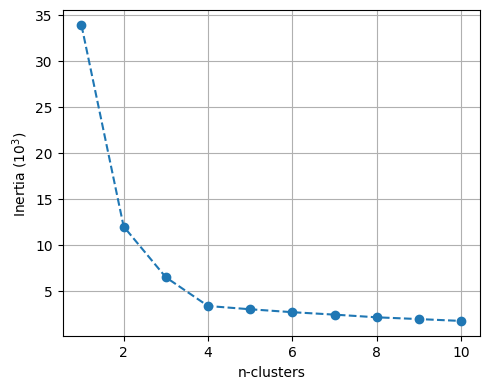

In [7]:
inertia = plot_inertia()

We can plot the Percentage Difference in each iteration, which in calculated for each couple of inertia values as:

\begin{center}
$ \Delta x (\%) = \frac{|x_{n+1} - x_{n}|}{x_{n+1}} \times 100\% $
\end{center}

In [8]:
inertia_diff = [abs(inertia[n+1] - inertia[n])*100/inertia[n+1] for n in range(0, 9)]

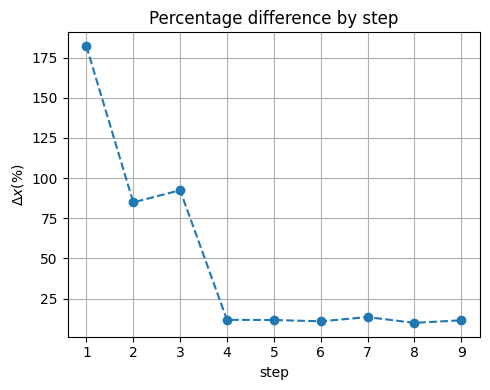

In [9]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 10), inertia_diff, marker='o', linestyle='--')

plt.title("Percentage difference by step")
plt.xlabel('step')
plt.ylabel('$\Delta x (\%)$')
plt.grid(True)

plt.tight_layout()
plt.show()

step 1: from n_clusters 1 to 2
step 2: from n_clusters 2 to 3
step 3: from n_clusters 3 to 4
step 4: from n_clusters 4 to 5
.
.
.

Here, the step (point) 4 corresponds to the Percentage Difference between n_clusters from 4 to 5. That means when reached n_clusters=4, no significant changes are further present. This confirms that n_clusters = 4 is the appropiate number.